In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
np.random.seed(33)

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/._chest_xray
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/._test
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/._train
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/._.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val/._.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val/PNEUMONIA/._person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val/PNEUMONIA/._person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val/PNEUMONIA/._person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val/PNEUMONIA/._person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/val/PNEUMONIA/._person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person913_virus_1570.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person322_virus_655.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person9_bacteria_41.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1395_virus_2398.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1125_bacteria_3066.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1076_bacteria_3016.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1600_bacteria_4202.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1448_virus_2468.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1481_virus_2567.jp

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1144_bacteria_3089.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1790_bacteria_4638.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person561_bacteria_2331.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person389_virus_778.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1139_bacteria_3081.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person833_virus_1469.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person513_virus_1030.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person336_bacteria_1551.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person37_bacteria_1

/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0816-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0244-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0327-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0866-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0837-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0612-0001-0002.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0568-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._IM-0172-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0994-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/__MACOSX/chest_xra

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person108_bacteria_507.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person88_bacteria_437.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person31_virus_70.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person78_bacteria_378.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person1620_virus_2807.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person104_bacteria_492.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person130_bacteria_623.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person42_virus_89.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person153_bacteria_726.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA/person172_bacteria_827.jpeg
/kaggle/input

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person259_bacteria_1220.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person148_virus_298.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1328_bacteria_3376.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person544_virus_1079.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1296_virus_2224.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1078_virus_1788.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person337_bacteria_1561.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person325_bacteria_1502.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person409_virus_816.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person36_bacteria_184.j

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1441_virus_2457.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person41_bacteria_206.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person67_bacteria_328.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person371_bacteria_1703.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person266_bacteria_1245.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person1081_virus_1793.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person764_bacteria_2668.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person853_virus_1498.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person581_bacteria_2395.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/person392_virus_782.

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0689-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0948-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0542-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0460-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0954-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0166-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0539-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1102-0001-0002.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/IM-0473-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0604-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/NORM

/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0345-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0012-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0337-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0086-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0364-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0372-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0035-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0085-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0274-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0079-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0028-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0339-0001.jpeg
/kaggle/input/chest-xray

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person276_bacteria_1297.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person630_bacteria_2514.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person414_bacteria_1835.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1227_virus_2078.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person370_virus_753.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person920_virus_1577.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person951_virus_1622.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person529_bacteria_2228.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person801_virus_1434.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person940_virus_1607.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1670_bacteria_4426.jpeg
/kaggle/input/ch

/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person561_bacteria_2331.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person328_bacteria_1514.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person755_virus_1380.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person981_bacteria_2908.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person539_virus_1069.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person488_bacteria_2061.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1119_virus_1844.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1444_bacteria_3732.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person543_bacteria_2284.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1066_virus_1769.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1087_virus_1799.jpeg
/kaggle/in

/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0476-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0350-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1291-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0923-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1180-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0618-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0713-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0700-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0881-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0381-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0959-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0949-0001.jpeg
/kaggle/input/chest-xray-pne

In [6]:
# Define our example directories and files
base_dir = '../input/chest-xray-pneumonia/chest_xray'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'val')
test_dir = os.path.join( base_dir,'test')

train_NORMAL_dir = os.path.join(train_dir, 'NORMAL') 
train_PNEUMONIA_dir = os.path.join(train_dir, 'PNEUMONIA')
validation_NORMALs_dir = os.path.join(validation_dir, 'NORMAL')
validation_PNEUMONIA_dir = os.path.join(validation_dir, 'PNEUMONIA')
test_NORMAL_dir = os.path.join(test_dir, 'NORMAL')
test_PNEUMONIA_dir = os.path.join(test_dir, 'PNEUMONIA')


train_NORMAL_fnames = os.listdir(train_NORMAL_dir)
train_PNEUMONIA_fnames = os.listdir(train_PNEUMONIA_dir)
validation_NORMAL_fnames = os.listdir(validation_NORMALs_dir)
validation_PNEUMONIA_fnames = os.listdir(validation_PNEUMONIA_dir)

#ratio of training set
train_ratio = (len(train_PNEUMONIA_fnames) + len(train_NORMAL_fnames))/(len(train_PNEUMONIA_fnames) + len(train_NORMAL_fnames)+len(validation_NORMAL_fnames) + len(validation_PNEUMONIA_fnames))

print(f'NORMAL class in Training set = {len(train_NORMAL_fnames)} : {round(len(train_NORMAL_fnames)/(len(train_NORMAL_fnames)+len(train_PNEUMONIA_fnames)),3)*100}%')
print(f'PNEUMONIA class in Training set = {len(train_PNEUMONIA_fnames)} : {round(len(train_PNEUMONIA_fnames)/(len(train_NORMAL_fnames)+len(train_PNEUMONIA_fnames)),3)*100}%')
print(f'Training set : Validation set ratio = {round(train_ratio*100,1)}% : {round((1-train_ratio)*100,1)}%')

NORMAL class in Training set = 1341 : 25.7%
PNEUMONIA class in Training set = 3875 : 74.3%
Training set : Validation set ratio = 99.7% : 0.3%


In [7]:
old_train_set = []
old_validation_set = []

for (dirpath, dirnames, filenames) in os.walk(train_dir):
    old_train_set += [os.path.join(dirpath, file) for file in filenames]
for (dirpath, dirnames, filenames) in os.walk(validation_dir):
    old_validation_set += [os.path.join(dirpath, file) for file in filenames]

full_train_set = old_train_set + old_validation_set #combine old training and validation set together for further splitting
full_train_set = pd.DataFrame({'abs_path' : full_train_set}) #put path into 
full_train_set.loc[full_train_set['abs_path'].str.contains('NORMAL'), 'Class'] = 'NORMAL'
full_train_set.loc[full_train_set['abs_path'].str.contains('PNEUMONIA'), 'Class'] = 'PNEUMONIA'
full_train_set.sample(5)

,abs_path,Class
2674,../input/chest-xray-pneumonia/chest_xray/train...,PNEUMONIA
3557,../input/chest-xray-pneumonia/chest_xray/train...,PNEUMONIA
1644,../input/chest-xray-pneumonia/chest_xray/train...,PNEUMONIA
3498,../input/chest-xray-pneumonia/chest_xray/train...,PNEUMONIA
2263,../input/chest-xray-pneumonia/chest_xray/train...,PNEUMONIA


In [8]:
X = full_train_set['abs_path']
y = full_train_set['Class']


val_split = 0.2

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = val_split,stratify=y,random_state=42)

train_set = pd.DataFrame({'abs_path':X_train,'Class':y_train})
validation_set = pd.DataFrame({'abs_path':X_val,'Class':y_val})

In [9]:
datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#Train Image Generator
train_generator=datagen.flow_from_dataframe(
dataframe=train_set,
x_col="abs_path",
y_col="Class",
batch_size=32,
seed=42,
shuffle=False,
class_mode="binary",
target_size=(150,150))

#Validation Image Generator
validation_generator=datagen.flow_from_dataframe(
dataframe=validation_set,
x_col="abs_path",
y_col="Class",
batch_size=32,
seed=42,
shuffle=False,
class_mode="binary",
target_size=(150,150))

#Test Image Generator
test_generator = test_datagen.flow_from_directory(
test_dir,
batch_size=32,
shuffle=False,    
class_mode="binary",
target_size = (150,150))

Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
normal_count = 0
pneumonia_count = 0
for i in range(len(train_generator.labels)):
    if train_generator.labels[i] == 0:
        normal_count += 1
    else:
        pneumonia_count += 1
        
assert(normal_count+pneumonia_count==len(train_generator.labels))


normal_weight = pneumonia_count/normal_count
pneumonia_weight = 1

class_weight = {0:normal_weight,1:pneumonia_weight}

In [11]:
val_normal_count = 0
val_pneumonia_count = 0
for i in range(len(validation_generator.labels)):
    if validation_generator.labels[i] == 0:
        val_normal_count += 1
    else:
        val_pneumonia_count += 1
        
print(f'normal in train set = {normal_count}')
print(f'pneumonia in train set = {pneumonia_count}')
print(f'normal in val set = {val_normal_count}')
print(f'pneumonia in val set = {val_pneumonia_count}')

normal in train set = 1079
pneumonia in train set = 3106
normal in val set = 270
pneumonia in val set = 777


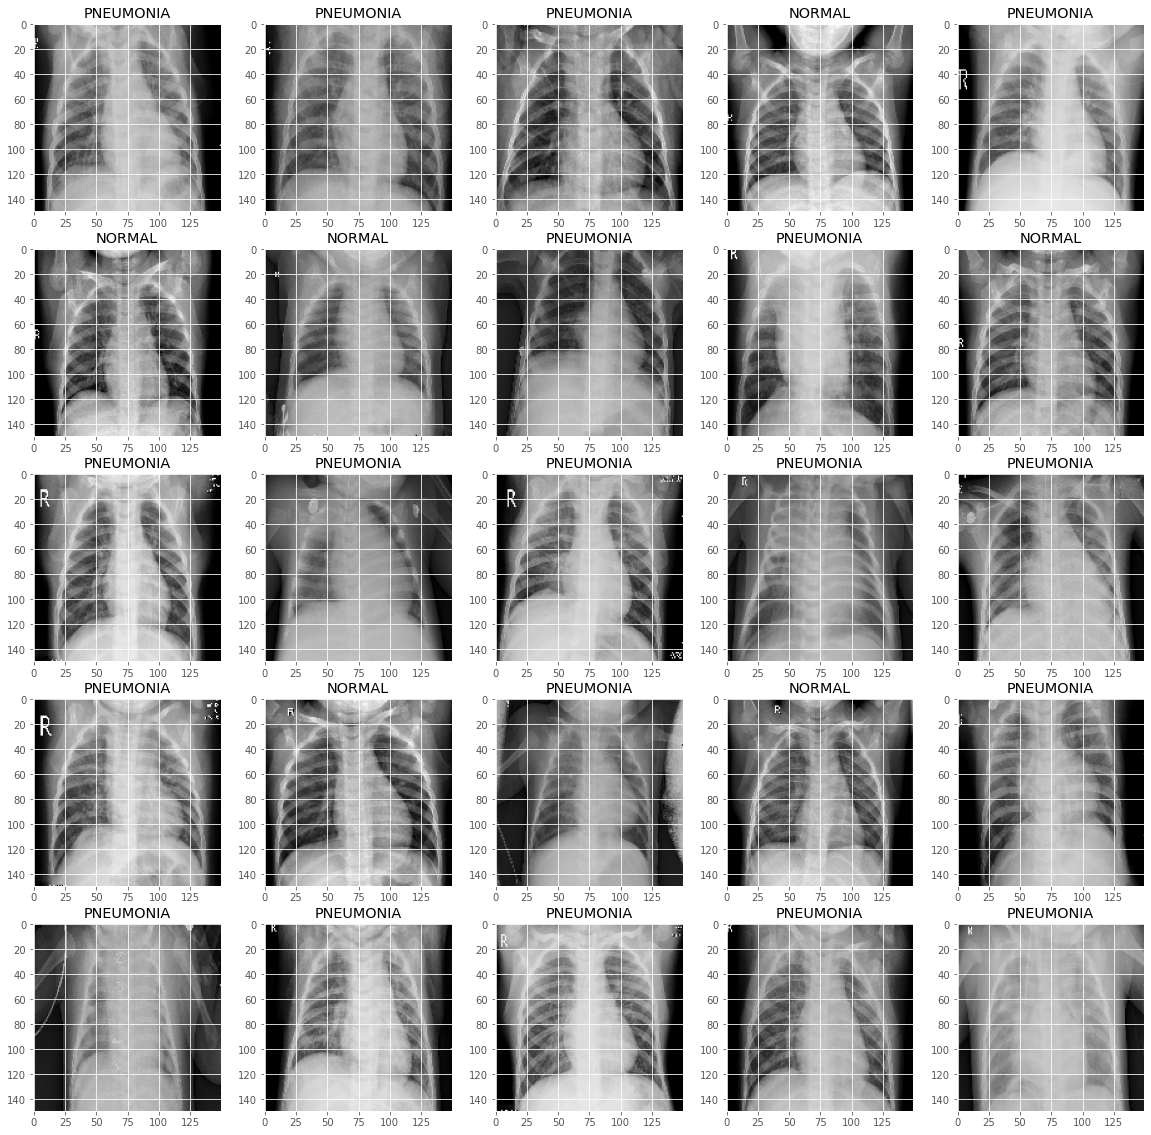

In [12]:
x_batch, y_batch = next(train_generator)
fig = plt.figure(figsize = (20,20))

for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(x_batch[i])
    if y_batch[i] == 1:
        plt.title('PNEUMONIA')
    else:
        plt.title('NORMAL')

In [13]:
from tensorflow.keras.applications.vgg16 import VGG16

def create_model():
    
    pre_trained_model = VGG16(input_shape=(150,150,3),include_top=False)
    
    #freeze layers weight 
    for layer in pre_trained_model.layers:
        layer.trainable = False
    
    
    last_layer = pre_trained_model.get_layer('block5_pool')
    print('last layer output shape: ', last_layer.output_shape)
    last_output = last_layer.output
    
    
    # Flatten the output layer to 1 dimension
    x = layers.Flatten()(last_output)
    # Add a fully connected layer with 128 hidden units and ReLU activation
    x = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001))(x)
    # Add a dropout rate of 0.2
    x = layers.Dropout(0.2)(x)
    # Add a final sigmoid layer for classification
    x = layers.Dense(1, activation='sigmoid')(x)           
    
    METRICS = [
          tf.keras.metrics.TruePositives(name='tp'),
          tf.keras.metrics.FalsePositives(name='fp'),
          tf.keras.metrics.TrueNegatives(name='tn'),
          tf.keras.metrics.FalseNegatives(name='fn'), 
          tf.keras.metrics.BinaryAccuracy(name='accuracy'),
          tf.keras.metrics.Precision(name='precision'),
          tf.keras.metrics.Recall(name='recall'),
          tf.keras.metrics.AUC(name='auc'),
    ]
    
    
    model = Model(pre_trained_model.input, x) 
    
    model.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy', 
                  metrics = METRICS)
    
    model.summary()

    return model

In [14]:
#Training hyperparameters
batch_size = 32
steps_per_epoch = len(train_generator.labels) // batch_size
validation_step = len(validation_generator.labels) // batch_size
epochs = 100

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

baseline_model = create_model()
baseline_history = baseline_model.fit(train_generator,
        validation_data = validation_generator,
        steps_per_epoch = steps_per_epoch,
        epochs = epochs,
        validation_steps = validation_step,
        callbacks = [early_stopping]
                            );

58892288/58889256 [==============================] - 0s 0us/step
last layer output shape:  (None, 4, 4, 512)
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
___________

130/130 [==============================] - 57s 442ms/step - loss: 0.0755 - tp: 3046.0000 - fp: 33.0000 - tn: 1040.0000 - fn: 34.0000 - accuracy: 0.9839 - precision: 0.9893 - recall: 0.9890 - auc: 0.9985 - val_loss: 0.1267 - val_tp: 756.0000 - val_fp: 29.0000 - val_tn: 235.0000 - val_fn: 4.0000 - val_accuracy: 0.9678 - val_precision: 0.9631 - val_recall: 0.9947 - val_auc: 0.9934
Epoch 13/100
130/130 [==============================] - 59s 454ms/step - loss: 0.0697 - tp: 3053.0000 - fp: 29.0000 - tn: 1040.0000 - fn: 31.0000 - accuracy: 0.9856 - precision: 0.9906 - recall: 0.9899 - auc: 0.9989 - val_loss: 0.1193 - val_tp: 755.0000 - val_fp: 29.0000 - val_tn: 235.0000 - val_fn: 5.0000 - val_accuracy: 0.9668 - val_precision: 0.9630 - val_recall: 0.9934 - val_auc: 0.9917
Epoch 14/100
130/130 [==============================] - 59s 451ms/step - loss: 0.0834 - tp: 3041.0000 - fp: 38.0000 - tn: 1032.0000 - fn: 42.0000 - accuracy: 0.9807 - precision: 0.9877 - recall: 0.9864 - auc: 0.9973 - val_los

In [15]:
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix, roc_curve
def plot_metrics(history):
    metrics =  ['loss', 'auc', 'precision', 'recall']
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('Preliminary performance of model', fontsize=16, y=1.05)
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        sns.lineplot(history.epoch,  history.history[metric], label='Train')
        sns.lineplot(history.epoch, history.history['val_'+metric] ,label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
          plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
          plt.ylim([0.8,1])
        else:
          plt.ylim([0,1])
    
        plt.legend()
        
    fig.tight_layout(pad=1.0)

def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Normal Chest X-rays Detected (True Negatives): ', cm[0][0])
    print('Normal Chest X-rays Incorrectly Detected (False Positives): ', cm[0][1])
    print('Pneumonia Chest X-rays Missed (False Negatives): ', cm[1][0])
    print('Pneumonia Chest X-rays Detected (True Positives): ', cm[1][1])
    print('Total Pneumonia Chest X-rays : ', np.sum(cm[1]))
    
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = roc_curve(labels, predictions)
    
    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

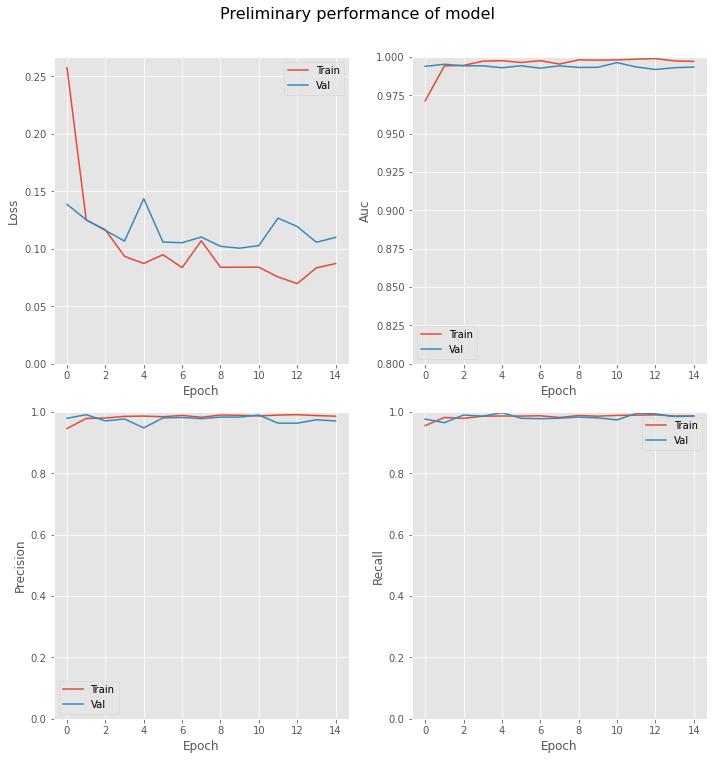

In [16]:
plot_metrics(baseline_history)

In [17]:
train_prediction_baseline = baseline_model.predict(train_generator, batch_size = batch_size)
test_prediction_baseline = baseline_model.predict(test_generator, batch_size = batch_size)

Normal Chest X-rays Detected (True Negatives):  51
Normal Chest X-rays Incorrectly Detected (False Positives):  183
Pneumonia Chest X-rays Missed (False Negatives):  1
Pneumonia Chest X-rays Detected (True Positives):  389
Total Pneumonia Chest X-rays :  390


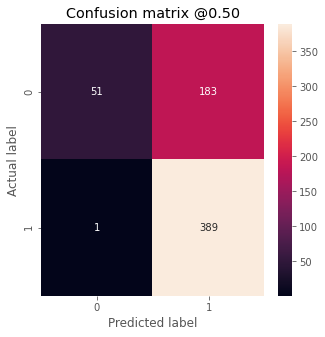

In [18]:
plot_cm(test_generator.labels,test_prediction_baseline)

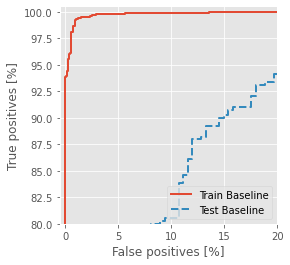

In [19]:
plot_roc("Train Baseline", train_generator.labels,train_prediction_baseline)
plot_roc("Test Baseline", test_generator.labels,test_prediction_baseline, linestyle='--')
plt.legend(loc='lower right')

In [20]:
#Checkpoint callback

checkpoint = tf.keras.callbacks.ModelCheckpoint("xray_model.h5",monitor='val_loss',save_best_only=True)

#Reduce LR on Plateau
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=5,
    verbose=0,
    mode="auto",
    min_lr=0.001)

In [21]:
finetuned_model = create_model()
#load weight from baseline model
finetuned_model.set_weights(baseline_model.get_weights());

last layer output shape:  (None, 4, 4, 512)
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_poo

In [22]:
#train some VGG16 layers
for count,layer in enumerate(finetuned_model.layers):
    if count in np.arange(15,23).tolist():
        layer.trainable = True
        
METRICS = [
          tf.keras.metrics.TruePositives(name='tp'),
          tf.keras.metrics.FalsePositives(name='fp'),
          tf.keras.metrics.TrueNegatives(name='tn'),
          tf.keras.metrics.FalseNegatives(name='fn'), 
          tf.keras.metrics.BinaryAccuracy(name='accuracy'),
          tf.keras.metrics.Precision(name='precision'),
          tf.keras.metrics.Recall(name='recall'),
          tf.keras.metrics.AUC(name='auc'),
    ]

    
finetuned_model.compile(optimizer = tf.keras.optimizers.Adam(),
            loss = 'binary_crossentropy', 
            metrics = METRICS)
finetuned_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

In [23]:
finetuned_history = finetuned_model.fit(train_generator,
        validation_data = validation_generator,
        steps_per_epoch = steps_per_epoch,
        epochs = epochs,
        validation_steps = validation_step,
        class_weight=class_weight, #introduce class weight into model training
        callbacks = [early_stopping,checkpoint,reduce_lr]
                            )

Epoch 1/100
130/130 [==============================] - 59s 451ms/step - loss: 0.8728 - tp: 2358.0000 - fp: 176.0000 - tn: 894.0000 - fn: 725.0000 - accuracy: 0.7830 - precision: 0.9305 - recall: 0.7648 - auc: 0.9029 - val_loss: 0.1278 - val_tp: 720.0000 - val_fp: 8.0000 - val_tn: 256.0000 - val_fn: 40.0000 - val_accuracy: 0.9531 - val_precision: 0.9890 - val_recall: 0.9474 - val_auc: 0.9941
Epoch 2/100
130/130 [==============================] - 57s 440ms/step - loss: 0.2063 - tp: 2941.0000 - fp: 42.0000 - tn: 1024.0000 - fn: 146.0000 - accuracy: 0.9547 - precision: 0.9859 - recall: 0.9527 - auc: 0.9881 - val_loss: 0.1339 - val_tp: 744.0000 - val_fp: 8.0000 - val_tn: 256.0000 - val_fn: 16.0000 - val_accuracy: 0.9766 - val_precision: 0.9894 - val_recall: 0.9789 - val_auc: 0.9864
Epoch 3/100
130/130 [==============================] - 57s 441ms/step - loss: 0.1702 - tp: 2974.0000 - fp: 25.0000 - tn: 1043.0000 - fn: 111.0000 - accuracy: 0.9673 - precision: 0.9917 - recall: 0.9640 - auc: 0.9

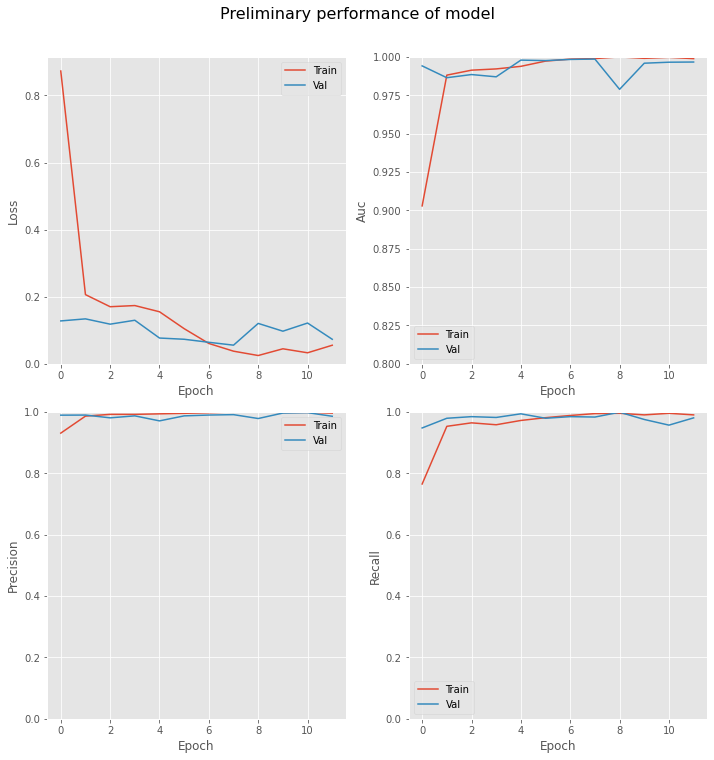

In [24]:
plot_metrics(finetuned_history)

In [25]:
train_prediction_finetuned = finetuned_model.predict(train_generator, batch_size = batch_size)
test_prediction_finetuned = finetuned_model.predict(test_generator, batch_size = batch_size)

Normal Chest X-rays Detected (True Negatives):  136
Normal Chest X-rays Incorrectly Detected (False Positives):  98
Pneumonia Chest X-rays Missed (False Negatives):  5
Pneumonia Chest X-rays Detected (True Positives):  385
Total Pneumonia Chest X-rays :  390


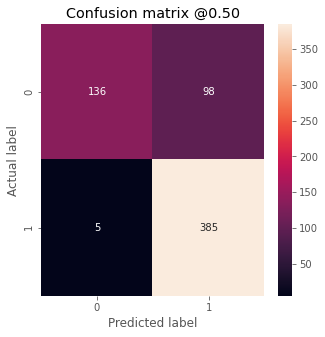

In [26]:
plot_cm(test_generator.labels,test_prediction_finetuned)

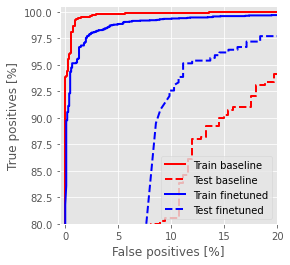

In [27]:
plot_roc("Train baseline", train_generator.labels,train_prediction_baseline,color='r')
plot_roc("Test baseline", test_generator.labels,test_prediction_baseline, linestyle='--',color='r')
plot_roc("Train finetuned", train_generator.labels,train_prediction_finetuned,color='b')
plot_roc("Test finetuned", test_generator.labels,test_prediction_finetuned, linestyle='--',color='b')
plt.legend(loc='lower right')

In [28]:
finetuned_results = finetuned_model.evaluate(test_generator,batch_size=batch_size, verbose=0)
for name, value in zip(finetuned_model.metrics_names, finetuned_results):
    print(name, ': ', value)

loss :  1.5022672414779663
tp :  385.0
fp :  98.0
tn :  136.0
fn :  5.0
accuracy :  0.8349359035491943
precision :  0.7971014380455017
recall :  0.9871794581413269
auc :  0.8756409287452698
